## Import libraries

In [4]:
import random

import numpy as np
import pickle, gzip
import seaborn as sns
np.random.seed(123) # for reproducibility

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

## Problèmatique 

On a un dataset qui contient des images de scanner sur le torse avec un label associé (Si le patient est atteint de Pneumonie ou pas). On cherche à comparer les differents modéles (Vgg, Inception, ResNet) pour la resolution d'un problème de classification binaire

## Function to plot the accuracy and loss curves of our models 

In [5]:
def affiche(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Import Data:

In [6]:
with gzip.open(('drive/MyDrive/chest_xray/pneumonia3.pkl.gz'), "rb") as file:
    [X_train,Y_train,X_test,Y_test] = pickle.load(file)

## Data Augmentation

In [7]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)


In [14]:
X_train.shape

(5216, 150, 150, 3)

In [8]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow(X_train,Y_train, batch_size = 20)

# Model Building 

## VGG16

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (150, 150, 3), # Shape of our images
                   include_top = False, # Leave out the last fully connected layer
                   weights = 'imagenet')

In [16]:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',
              metrics = ['acc'])

In [18]:
vgghist = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 10)

Epoch 1/10
250/250 [==============================] - 37s 140ms/step - loss: 1.4023 - acc: 0.8677 - val_loss: 1.1709 - val_acc: 0.8285
Epoch 2/10
250/250 [==============================] - 33s 132ms/step - loss: 0.5895 - acc: 0.9037 - val_loss: 0.8483 - val_acc: 0.8478
Epoch 3/10
250/250 [==============================] - 31s 123ms/step - loss: 0.3890 - acc: 0.9093 - val_loss: 0.5097 - val_acc: 0.8830
Epoch 4/10
250/250 [==============================] - 31s 123ms/step - loss: 0.3133 - acc: 0.9203 - val_loss: 0.4572 - val_acc: 0.8878
Epoch 5/10
250/250 [==============================] - 30s 121ms/step - loss: 0.2909 - acc: 0.9253 - val_loss: 0.5576 - val_acc: 0.8734
Epoch 6/10
250/250 [==============================] - 31s 126ms/step - loss: 0.2985 - acc: 0.9211 - val_loss: 0.4900 - val_acc: 0.8814
Epoch 7/10
250/250 [==============================] - 32s 127ms/step - loss: 0.2774 - acc: 0.9249 - val_loss: 0.5620 - val_acc: 0.8814
Epoch 8/10
250/250 [==============================] - 3

### Evaluation of VGG model

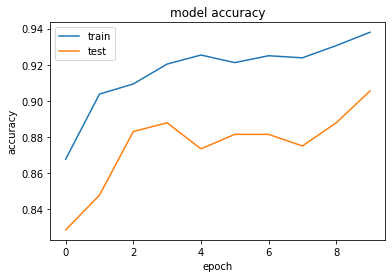

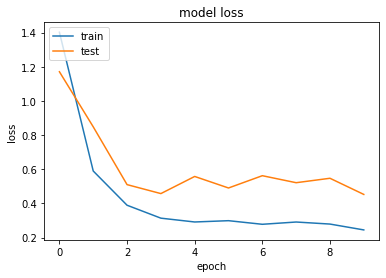

In [19]:
affiche(vgghist) #donnee en annexe

In [20]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

20/20 [==============================] - 2s 68ms/step


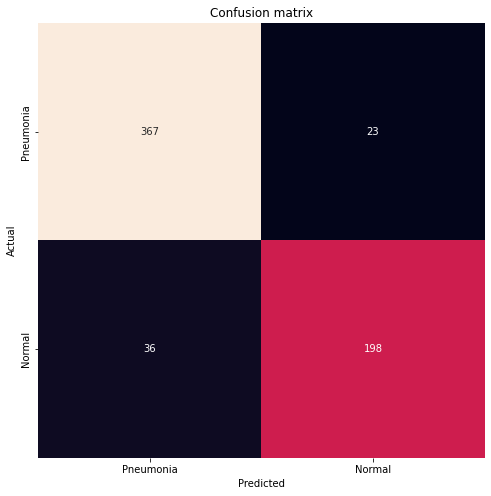

In [21]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       390
           1       0.90      0.85      0.87       234

    accuracy                           0.91       624
   macro avg       0.90      0.89      0.90       624
weighted avg       0.91      0.91      0.90       624



## Inception V3

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [24]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [25]:
inception = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 10)


Epoch 1/10
250/250 [==============================] - 76s 184ms/step - loss: 0.2631 - acc: 0.8997 - val_loss: 0.6051 - val_acc: 0.9135
Epoch 2/10
250/250 [==============================] - 34s 133ms/step - loss: 0.1560 - acc: 0.9428 - val_loss: 1.4899 - val_acc: 0.9103
Epoch 3/10
250/250 [==============================] - 38s 150ms/step - loss: 0.1272 - acc: 0.9590 - val_loss: 0.4592 - val_acc: 0.9231
Epoch 4/10
250/250 [==============================] - 41s 166ms/step - loss: 0.1225 - acc: 0.9578 - val_loss: 0.2760 - val_acc: 0.9327
Epoch 5/10
250/250 [==============================] - 42s 166ms/step - loss: 0.0968 - acc: 0.9648 - val_loss: 0.7882 - val_acc: 0.9279
Epoch 6/10
250/250 [==============================] - 35s 138ms/step - loss: 0.0914 - acc: 0.9694 - val_loss: 0.9015 - val_acc: 0.9327
Epoch 7/10
250/250 [==============================] - 37s 147ms/step - loss: 0.0885 - acc: 0.9682 - val_loss: 0.5355 - val_acc: 0.9231
Epoch 8/10
250/250 [==============================] - 3

### Evaluation of Inception model

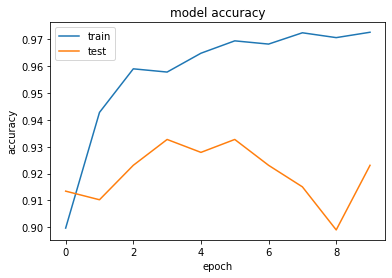

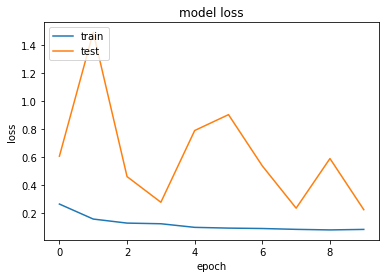

In [30]:
affiche(inception) #donnee en annexe

In [31]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

20/20 [==============================] - 1s 36ms/step


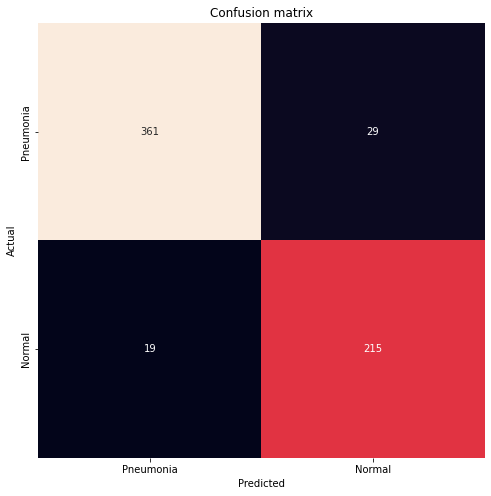

In [32]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       390
           1       0.88      0.92      0.90       234

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624



## ResNet50

In [38]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150, 150,3), include_top=False, weights="imagenet")

In [39]:
for layer in base_model.layers:
    layer.trainable = False

In [40]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'binary_crossentropy',
              metrics = ['acc'])

In [41]:
resnet_history = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, 
                           epochs = 10)


Epoch 1/10
250/250 [==============================] - 37s 131ms/step - loss: 2.0397 - acc: 0.8587 - val_loss: 0.4699 - val_acc: 0.8269
Epoch 2/10
250/250 [==============================] - 31s 122ms/step - loss: 0.3292 - acc: 0.9023 - val_loss: 0.5822 - val_acc: 0.8349
Epoch 3/10
250/250 [==============================] - 30s 119ms/step - loss: 0.2721 - acc: 0.9139 - val_loss: 0.7495 - val_acc: 0.7468
Epoch 4/10
250/250 [==============================] - 30s 119ms/step - loss: 0.2497 - acc: 0.9253 - val_loss: 0.4315 - val_acc: 0.8622
Epoch 5/10
250/250 [==============================] - 31s 122ms/step - loss: 0.2528 - acc: 0.9179 - val_loss: 0.5810 - val_acc: 0.8478
Epoch 6/10
250/250 [==============================] - 30s 120ms/step - loss: 0.2394 - acc: 0.9265 - val_loss: 0.2801 - val_acc: 0.8846
Epoch 7/10
250/250 [==============================] - 29s 118ms/step - loss: 0.2024 - acc: 0.9301 - val_loss: 0.5069 - val_acc: 0.8734
Epoch 8/10
250/250 [==============================] - 3

### Evaluation of ResNet 50 model

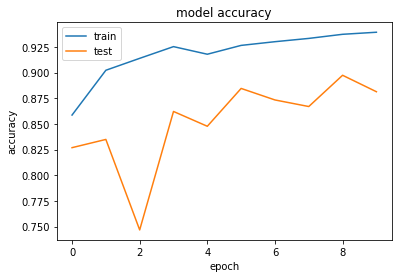

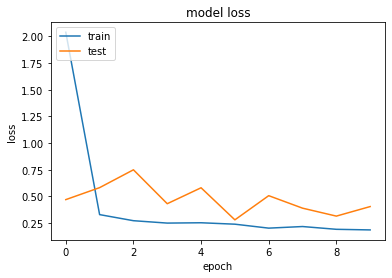

In [42]:
affiche(resnet_history) #donnee en annexe

In [43]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

20/20 [==============================] - 2s 51ms/step


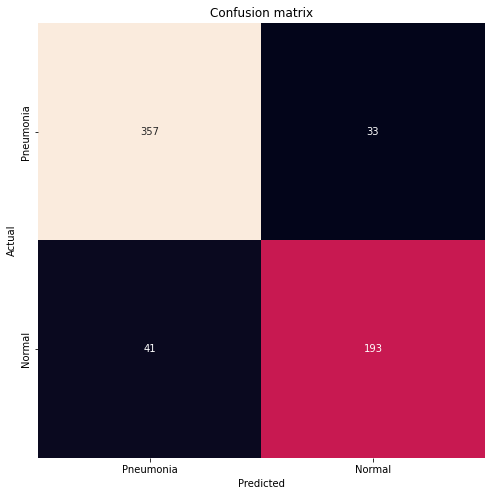

In [44]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, 
            yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       390
           1       0.85      0.82      0.84       234

    accuracy                           0.88       624
   macro avg       0.88      0.87      0.87       624
weighted avg       0.88      0.88      0.88       624

